<a href="https://colab.research.google.com/github/a1l2u3/Artificial-Neural-Networks-/blob/ANN/ANN_Practical4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

4. With a suitable example demonstrate the perceptron learning law with its decision regions using
python. Give the output in graphical form.

1)Initialize Perceptron:
Initialize the weights and bias randomly or to zero.
Define the learning rate and maximum number of epochs.

2)Generate Training Data:
Generate synthetic data points for two classes with two features each.

3)Train the Perceptron:
Use the perceptron learning algorithm to update weights until convergence or after a fixed number of epochs.
Iterate over the training data:
Compute the predicted output using current weights.
Update weights based on the prediction error and learning rate.

4)Plot Decision Regions:
Generate a mesh grid covering the entire feature space.
For each point in the mesh grid, classify it using the trained perceptron and assign a color corresponding to the predicted class.
Plot the training data points along with the decision boundary and decision regions.

5)Display Output:
Show the plot with decision regions and training data points.

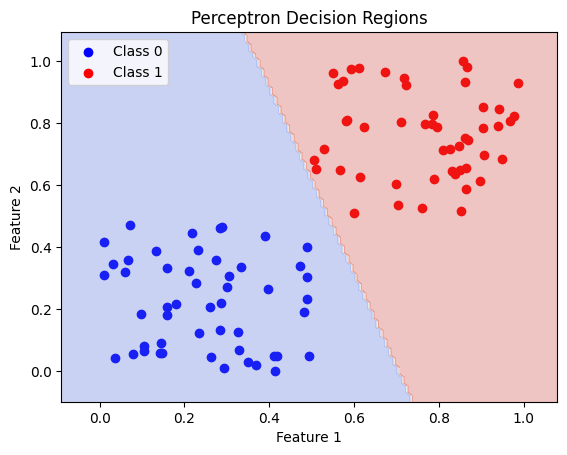

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Perceptron class
class Perceptron:
    def __init__(self, input_size, lr=0.01, epochs=100):
        self.W = np.zeros(input_size + 1)  # Initialize weights (including bias)
        self.lr = lr  # Learning rate
        self.epochs = epochs  # Maximum number of epochs

    # Activation function (step function)
    def activation_fn(self, x):
        return 1 if x >= 0 else 0

    # Predict function
    def predict(self, x):
        x = np.insert(x, 0, 1)  # Inserting bias
        z = self.W.T.dot(x)
        a = self.activation_fn(z)
        return a

    # Train function
    def train(self, X, d):
        for _ in range(self.epochs):
            for i in range(d.shape[0]):
                x = np.insert(X[i], 0, 1)  # Inserting bias
                y = self.predict(X[i])
                e = d[i] - y
                self.W = self.W + self.lr * e * x


# Generate synthetic data points for two classes
np.random.seed(0)
class_0 = np.random.rand(50, 2) * 0.5
class_1 = (np.random.rand(50, 2) * 0.5) + 0.5

# Plot the training data points
plt.scatter(class_0[:, 0], class_0[:, 1], color='blue', label='Class 0')
plt.scatter(class_1[:, 0], class_1[:, 1], color='red', label='Class 1')

# Define training data and labels
X = np.concatenate((class_0, class_1))
d = np.array([0] * 50 + [1] * 50)

# Train the perceptron
perceptron = Perceptron(input_size=2)
perceptron.train(X, d)

# Plot decision regions
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))
Z = np.array([perceptron.predict(np.array([x, y])) for x, y in np.c_[xx.ravel(), yy.ravel()]])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Perceptron Decision Regions')
plt.legend()
plt.show()
